In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [2]:
from sklearn import datasets 
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import precision_score

In [4]:
import sklearn.neighbors

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np


In [7]:
import time

In [8]:
from sklearn.svm import SVC

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.metrics import recall_score

In [11]:
var = np.random.randint(70000, size=5000)

In [12]:
echantillon = mnist.data[var]

In [13]:
newtarget = mnist.target[var]

In [14]:
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, newtarget, 
train_size=0.7) 

In [15]:
clf = SVC(kernel='linear').fit(xtrain,ytrain)

In [16]:
print(ytest[4])

9


In [17]:
clf.predict([xtest[4]])

array(['9'], dtype=object)

In [18]:
clf.score(xtest,ytest)

0.918

In [19]:
clf.score(xtrain,ytrain)

1.0

temps d'execution:  3.3684046268463135
temps d'execution:  4.5136964321136475
temps d'execution:  1.9223113059997559
temps d'execution:  2.969987154006958


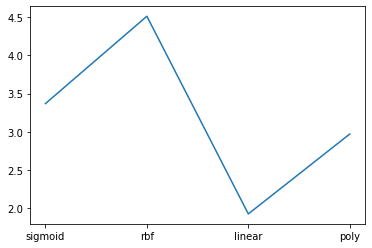

In [15]:
#temps d'execution des kernels

execution_time=[]
values_of_c =['sigmoid','rbf','linear','poly']

for c in values_of_c:
    
    clf = SVC(kernel=c)
    begin = time.time()
    clf.fit(xtrain,ytrain)
    predicted = clf.predict(X=xtest)
    end = time.time()
    
    total_time = end - begin
    execution_time.append(total_time)
    print("temps d'execution: ",total_time)
    
plt.plot(values_of_c,execution_time)
plt.show()

score:  0.8533333333333334
score:  0.9513333333333334
score:  0.91
score:  0.928


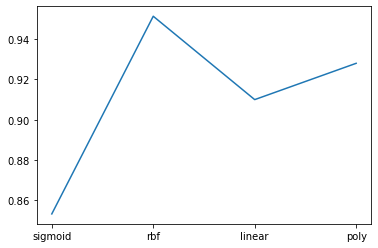

In [16]:
#score des kernels

score=[]
values_of_c =['sigmoid','rbf','linear','poly']

for c in values_of_c:
    
    clf = SVC(kernel=c)
    
    clf.fit(xtrain,ytrain)
    predicted = clf.predict(X=xtest)
    
    score.append(clf.score(xtest,ytest))
    print("score: ",clf.score(xtest,ytest))
    
plt.plot(values_of_c,score)
plt.show()

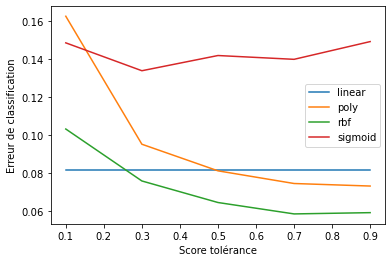

In [46]:
score_linear = []
score_poly = []
score_rbf = []
score_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        start = time.time()
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        elapsed = time.time() - start
        score = clf.score(xtest,ytest)
        #print('Kernel '+ ker + ', tolérance='+ str(i) + ' '+ ' : score = ' + str(score))
        if(ker=='linear'):
            score_linear.append(1-score)
        elif(ker=='poly'):
            score_poly.append(1-score)
        elif(ker=='rbf'):
            score_rbf.append(1-score)
        elif(ker=='sigmoid'):
            score_sigmoid.append(1-score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,score_linear, label="linear")
plt.plot(c,score_poly, label="poly")
plt.plot(c,score_rbf, label="rbf")
plt.plot(c,score_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Erreur de classification test")
plt.legend()

plt.show()

            

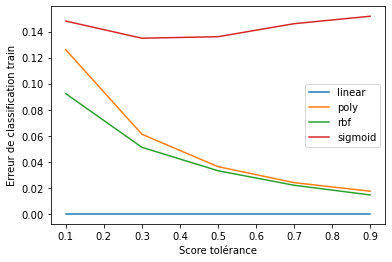

In [48]:
score_linear = []
score_poly = []
score_rbf = []
score_sigmoid = []


for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = clf.score(xtrain,ytrain)
        #print('Kernel '+ ker + ', tolérance='+ str(i) + ' '+ ' : score = ' + str(score))
        if(ker=='linear'):
            score_linear.append(1-score)
        elif(ker=='poly'):
            score_poly.append(1-score)
        elif(ker=='rbf'):
            score_rbf.append(1-score)
        elif(ker=='sigmoid'):
            score_sigmoid.append(1-score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,score_linear, label="linear")
plt.plot(c,score_poly, label="poly")
plt.plot(c,score_rbf, label="rbf")
plt.plot(c,score_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Erreur de classification train")
plt.legend()

plt.show()

In [34]:
c=[0.1,0.3,0.5,0.7,0.9]

In [51]:
cm = confusion_matrix(ytest, clf.predict(xtest))

In [52]:
print(cm)

[[123   0   4   2   0   2   1   1   1   0]
 [  0 193   1   1   0   0   0   0   3   1]
 [  3   2 122   3   4   0   8   1   7   1]
 [  2   1   4 113   0  20   3   1   6   3]
 [  0   0   0   0 135   1   0   0   0   6]
 [  8   7   0  13   5  92   7   0   8   2]
 [  3   1   4   1   2   2 123   0   0   0]
 [  1   3   5   0   1   0   1 137   1   7]
 [  1   4   1   5   3  12   0   1 113   2]
 [  2   2   0   1   5   0   0  10   0 125]]


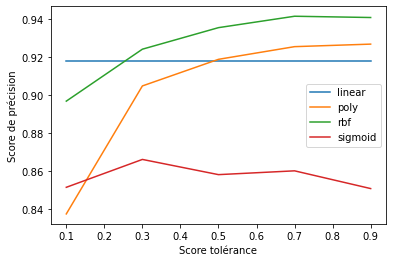

In [56]:
preci_linear = []
preci_poly = []
preci_rbf = []
preci_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = precision_score(ytest, clf.predict(xtest), average='micro')
        if(ker=='linear'):
            preci_linear.append(score)
        elif(ker=='poly'):
            preci_poly.append(score)
        elif(ker=='rbf'):
            preci_rbf.append(score)
        elif(ker=='sigmoid'):
            preci_sigmoid.append(score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,preci_linear, label="linear")
plt.plot(c,preci_poly, label="poly")
plt.plot(c,preci_rbf, label="rbf")
plt.plot(c,preci_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Score de précision")
plt.legend()

plt.show()

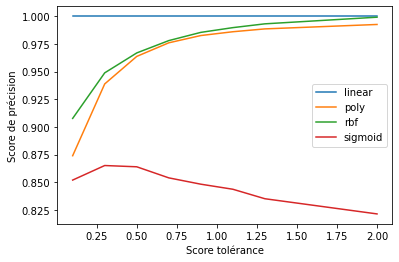

In [66]:
preci_linear = []
preci_poly = []
preci_rbf = []
preci_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9,1.1,1.3,2):
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = precision_score(ytrain, clf.predict(xtrain), average='micro')
        if(ker=='linear'):
            preci_linear.append(score)
        elif(ker=='poly'):
            preci_poly.append(score)
        elif(ker=='rbf'):
            preci_rbf.append(score)
        elif(ker=='sigmoid'):
            preci_sigmoid.append(score)
            
c=[0.1,0.3,0.5,0.7,0.9,1.1,1.3,2]
plt.plot(c,preci_linear, label="linear")
plt.plot(c,preci_poly, label="poly")
plt.plot(c,preci_rbf, label="rbf")
plt.plot(c,preci_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Score de précision")
plt.legend()

plt.show()

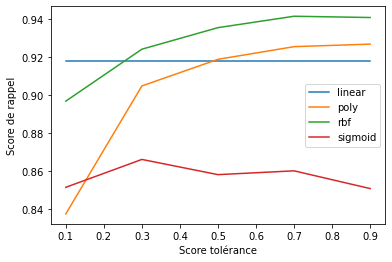

In [59]:
recall_linear = []
recall_poly = []
recall_rbf = []
recall_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = recall_score(ytest, clf.predict(xtest), average='micro')
        if(ker=='linear'):
            recall_linear.append(score)
        elif(ker=='poly'):
            recall_poly.append(score)
        elif(ker=='rbf'):
            recall_rbf.append(score)
        elif(ker=='sigmoid'):
            recall_sigmoid.append(score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,recall_linear, label="linear")
plt.plot(c,recall_poly, label="poly")
plt.plot(c,recall_rbf, label="rbf")
plt.plot(c,recall_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Score de rappel")
plt.legend()

plt.show()

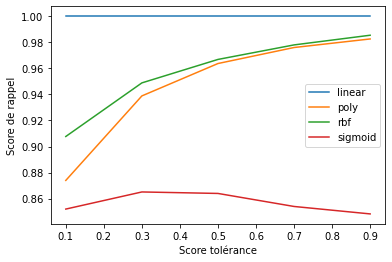

In [60]:
recall_linear = []
recall_poly = []
recall_rbf = []
recall_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = recall_score(ytrain, clf.predict(xtrain), average='micro')
        if(ker=='linear'):
            recall_linear.append(score)
        elif(ker=='poly'):
            recall_poly.append(score)
        elif(ker=='rbf'):
            recall_rbf.append(score)
        elif(ker=='sigmoid'):
            recall_sigmoid.append(score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,recall_linear, label="linear")
plt.plot(c,recall_poly, label="poly")
plt.plot(c,recall_rbf, label="rbf")
plt.plot(c,recall_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Score de rappel")
plt.legend()

plt.show()

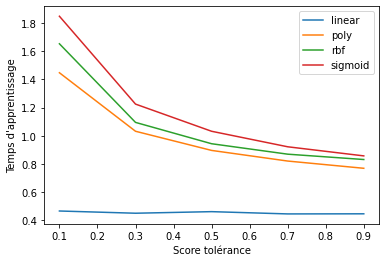

In [62]:
time_linear = []
time_poly = []
time_rbf = []
time_sigmoid = []

for ker in ('linear','poly','rbf','sigmoid'):
    for i in(0.1,0.3,0.5,0.7,0.9):
        start = time.time()
        clf = SVC(kernel=ker, C=i).fit(xtrain,ytrain)
        score = time.time() - start
        if(ker=='linear'):
            time_linear.append(score)
        elif(ker=='poly'):
            time_poly.append(score)
        elif(ker=='rbf'):
            time_rbf.append(score)
        elif(ker=='sigmoid'):
            time_sigmoid.append(score)
            
c=[0.1,0.3,0.5,0.7,0.9]
plt.plot(c,time_linear, label="linear")
plt.plot(c,time_poly, label="poly")
plt.plot(c,time_rbf, label="rbf")
plt.plot(c,time_sigmoid, label="sigmoid")
plt.xlabel("Score tolérance")
plt.ylabel("Temps d'apprentissage")
plt.legend()

plt.show()